In [1]:
# Importing Standard Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [200]:
#Reading data
df=pd.read_csv('Downloads/Thera_Bank_model.csv')
df_copy=df.copy() #copy for reference
df.head(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [199]:
#Names of variables and shapes of data

print(df.columns)
print(df.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


In [198]:
df.shape

(5000, 14)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [201]:
# Univariate analysis with help of pandas_profiling

!pip install pandas_profiling
import pandas_profiling
df.profile_report()

In [203]:
#checking for missing value
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [58]:
#checking mean,median and IQR
df.describe().transpose()

count          mean          std     min      25%  \
Age                 5000.0     45.338400    11.463166    23.0     35.0   
Income              5000.0     73.774200    46.033729     8.0     39.0   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.0   
Family              5000.0      2.396400     1.147663     1.0      1.0   
CCAvg               5000.0      1.937938     1.747659     0.0      0.7   
Education           5000.0      1.881000     0.839869     1.0      1.0   
Mortgage            5000.0     56.498800   101.713802     0.0      0.0   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.0   
Securities Account  5000.0      0.104400     0.305809     0.0      0.0   
CD Account          5000.0      0.060400     0.238250     0.0      0.0   
Online              5000.0      0.596800     0.490589     0.0      0.0   
CreditCard          5000.0      0.294000     0.455637     0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Income                 64.0     98.0    224.0  
ZIP Code            93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal Loan           0.0      0.0      1.0  
Securities Account      0.0      0.0      1.0  
CD Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

In [175]:
#finding unique data
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

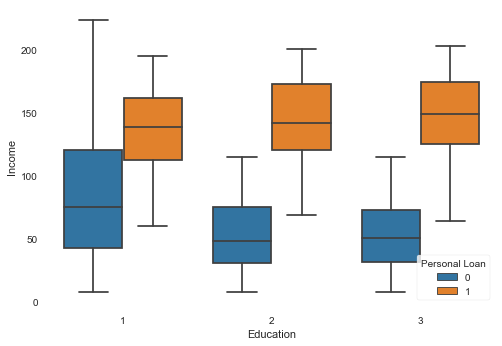

In [75]:
sns.boxplot(x="Education",y="Income",hue="Personal Loan",data=df)

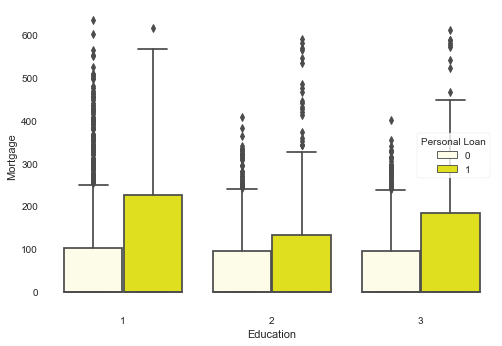

In [77]:
sns.boxplot(x="Education",y="Mortgage",hue="Personal Loan",data=df,color='yellow')

In [ ]:
sns.pairplot(df)

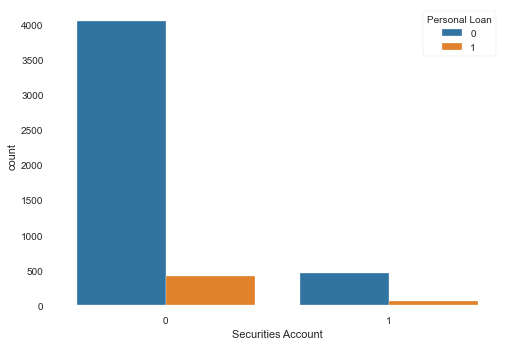

In [78]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

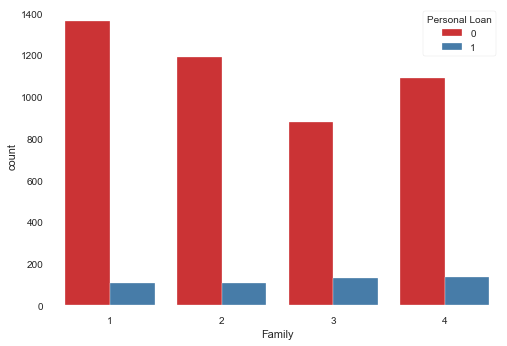

In [80]:
sns.countplot(x="Family",data=df,hue="Personal Loan",palette='Set1')

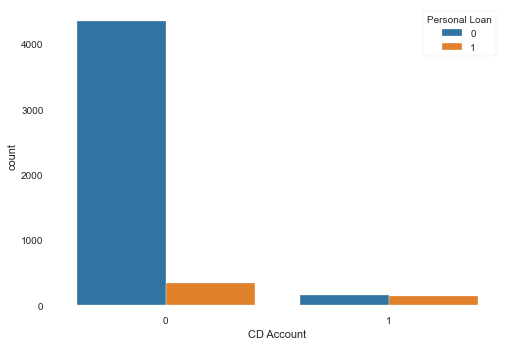

In [82]:
sns.countplot(x="CD Account",data=df,hue="Personal Loan")

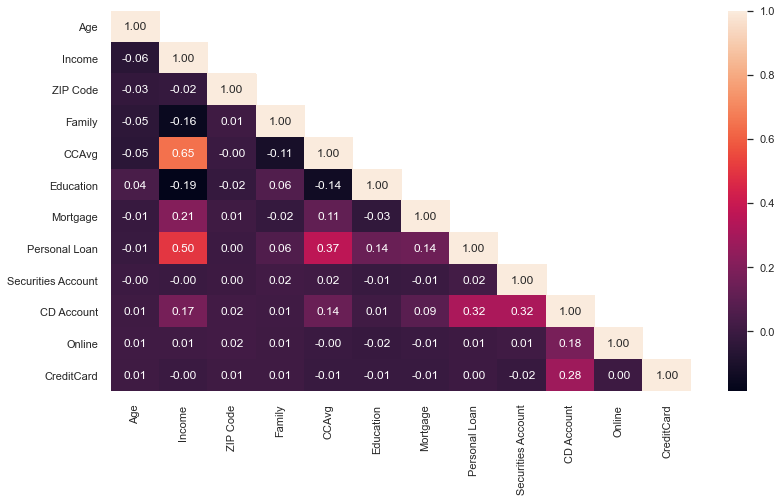

In [88]:
#correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
sns.set_context("notebook",font_scale=1.0,rc={"lines.linewidth":2.5})
plt.figure(figsize=(13,7))
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)]=True
a= sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')



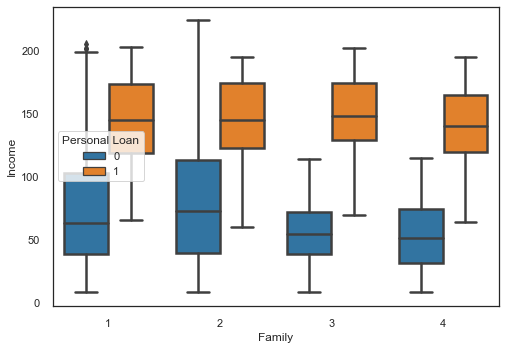

In [98]:
sns.boxplot(x="Family",y="Income",hue="Personal Loan",data=df)

In [109]:
#Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc




In [187]:
column =['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']
X = df[column]
y = df['Personal Loan']

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [191]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: inf
         Iterations: 35
                                   Results: Logit
Model:                      Logit                   Pseudo R-squared:        -inf   
Dependent Variable:         Personal Loan           AIC:                     inf    
Date:                       2020-08-31 12:44        BIC:                     inf    
No. Observations:           5000                    Log-Likelihood:          -inf   
Df Model:                   13                      LL-Null:                 -1581.0
Df Residuals:               4986                    LLR p-value:             1.0000 
Converged:                  0.0000                  Scale:                   1.0000 
No. Iterations:             35.0000                                                 
------------------------------------------------------------------------------------
                     Coef.      Std.Err.      z    P>|z|      [0.025       0.975]   
---------------------------------------

In [192]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [193]:
print(classification_report(y_train, logreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3148
           1       0.77      0.57      0.65       352

    accuracy                           0.94      3500
   macro avg       0.86      0.77      0.81      3500
weighted avg       0.93      0.94      0.94      3500



In [194]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.9467


In [195]:
#confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[1352   20]
 [  60   68]]


In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.77      0.53      0.63       128

    accuracy                           0.95      1500
   macro avg       0.87      0.76      0.80      1500
weighted avg       0.94      0.95      0.94      1500



In [ ]:
# number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.